In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ana\Dropbox\Mi PC (LAPTOP-H1QC8MVH)\Desktop\UC3M\4curso\TFG\tfg_uc3m_2024\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ana\AppData\Local\Temp\ipykernel_20516\3929332396.py", line 4, in <module>
    from sklearn.model_selection import train_test_split
  File "c:\Users\ana\Dropbox\Mi PC (LAPTOP-H1QC8MVH)\Desktop\UC3M\4curso\TFG\tfg_uc3m_2024\venv\lib\site-packages\sklearn\__init__.py", line 87, in <module>
    from .base import clone
  File "c:\Users\ana\Dropbox\Mi PC (LAPTOP-H1QC8MVH)\Desktop\UC3M\4curso\TFG\tfg_uc3m_2024\venv\lib\site-packages\sklearn\base.py", line 19, in <module>
    from .utils import _IS_32BIT
  File "c:\Users\ana\Dropbox\Mi PC (LAPTOP-H1QC8MVH)\Desktop\UC3M\4curso\TFG\tfg_uc3m_2024\venv\lib\site-packages\sklearn\utils\__init__.py", line 22, in <module>
    from ._estimator_html_repr import estimator_html_rep

## Obtención de los datos

In [ ]:
# Leer los datos
data = pd.read_csv('./datos_2023.csv', delimiter=';', encoding='latin-1')

# Seleccionar las columnas relevantes
clustering_data = data[data['Nombre'] != 'Madrid'][data['Serie'] == 'Municipios'][['Nombre', 'zona_estadistica', 'zona_estadistica_codigo', 'densidad_poblacion', 'distancia_capital']]
print(clustering_data)

                     Nombre     zona_estadistica  zona_estadistica_codigo  \
0              Acebeda (La)         Sierra Norte                      6.0   
1                   Ajalvir   Este Metropolitano                      3.0   
2         Alameda del Valle         Sierra Norte                      6.0   
3                Alamo (El)   Sudoeste Comunidad                      9.0   
4        AlcalÃ¡ de Henares   Este Metropolitano                      3.0   
..                      ...                  ...                      ...   
174         Villar del Olmo    Sudeste Comunidad                      8.0   
175  Villarejo de SalvanÃ©s    Sudeste Comunidad                      8.0   
176   Villaviciosa de OdÃ³n  Oeste Metropolitano                      5.0   
177   Villavieja del Lozoya         Sierra Norte                      6.0   
178               Zarzalejo           Sierra Sur                     10.0   

     densidad_poblacion  distancia_capital  
0                  3.06       

C:\Users\ana\AppData\Local\Temp\ipykernel_2140\3857611785.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clustering_data = data[data['Nombre'] != 'Madrid'][data['Serie'] == 'Municipios'][['Nombre', 'zona_estadistica', 'zona_estadistica_codigo', 'densidad_poblacion', 'distancia_capital']]


## EDA

Para poder realizar un clustering basado en densidad de población, además de zonas estadísticas, realizamos un estudio de los datos:

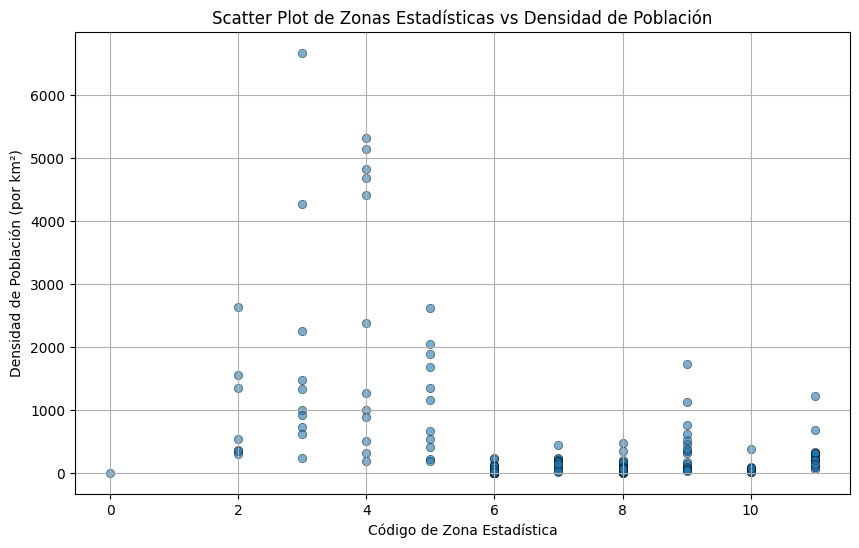

In [ ]:
# Crear un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zona_estadistica_codigo', y='densidad_poblacion', data=clustering_data, alpha=0.6, edgecolor='black')
plt.title('Scatter Plot de Zonas Estadísticas vs Densidad de Población')
plt.xlabel('Código de Zona Estadística')
plt.ylabel('Densidad de Población (por km²)')
plt.grid(True)
plt.show()

## Creación de K-Means

In [ ]:
features = clustering_data[['zona_estadistica_codigo', 'densidad_poblacion', 'distancia_capital']]
# Normalización de los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Confirmar la normalización
features_scaled.mean(axis=0), features_scaled.std(axis=0)

X = features_scaled
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

## Prueba del codo

c:\Users\ana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

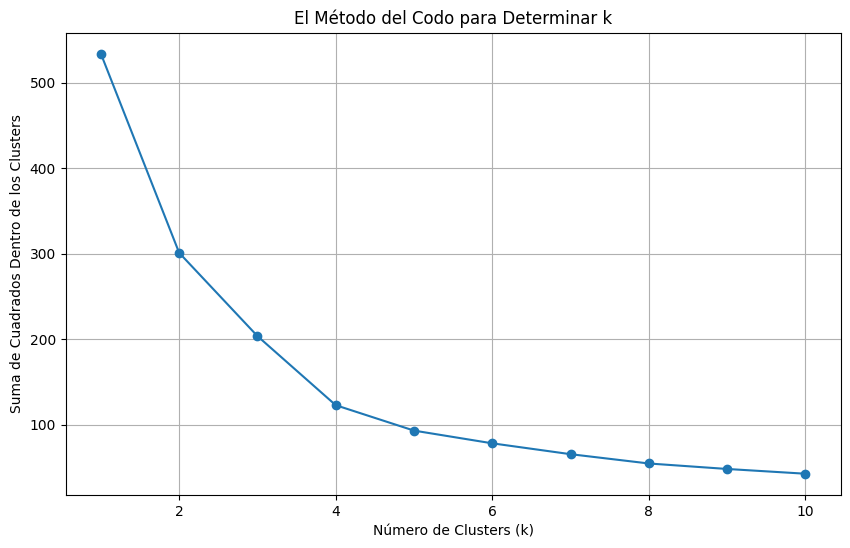

In [ ]:
import matplotlib.pyplot as plt

# Método del codo para determinar el número óptimo de clusters
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Graficar la suma de cuadrados dentro de los clusters para cada k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('El Método del Codo para Determinar k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados Dentro de los Clusters')
plt.grid(True)
plt.show()

## Fit y predicción

La normalización de datos solo es necesaria si estás utilizando características en diferentes escalas. Sin embargo, en este caso, parece que solo estamos utilizando una característica (densidad de población), así que la normalización puede no ser necesaria.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

test_labels = kmeans.predict(X_test)

c:\Users\ana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Scatterplot de X_train

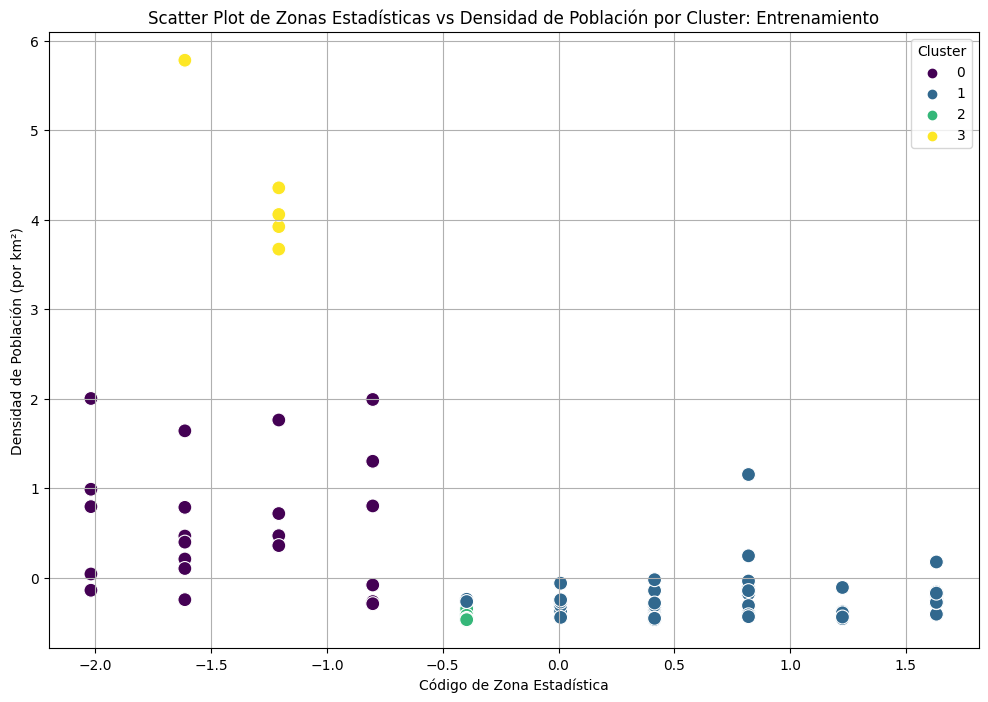

In [ ]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=kmeans.labels_, data=X_train, palette='viridis', s=100)
plt.title('Scatter Plot de Zonas Estadísticas vs Densidad de Población por Cluster: Entrenamiento')
plt.xlabel('Código de Zona Estadística')
plt.ylabel('Densidad de Población (por km²)')
plt.legend(title='Cluster')
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Scatterplot de X_test

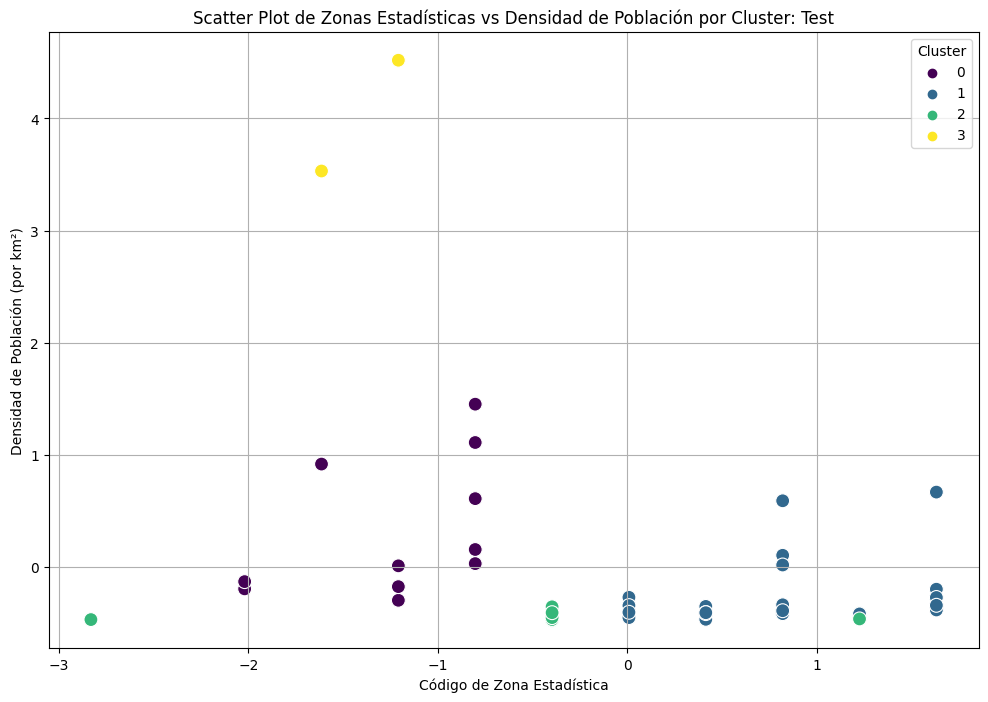

In [ ]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=test_labels, data=X_test, palette='viridis', s=100)
plt.title('Scatter Plot de Zonas Estadísticas vs Densidad de Población por Cluster: Test')
plt.xlabel('Código de Zona Estadística')
plt.ylabel('Densidad de Población (por km²)')
plt.legend(title='Cluster')
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Clustering general

In [ ]:
labels = kmeans.predict(X)
clustering_data['Cluster estadistico'] = labels

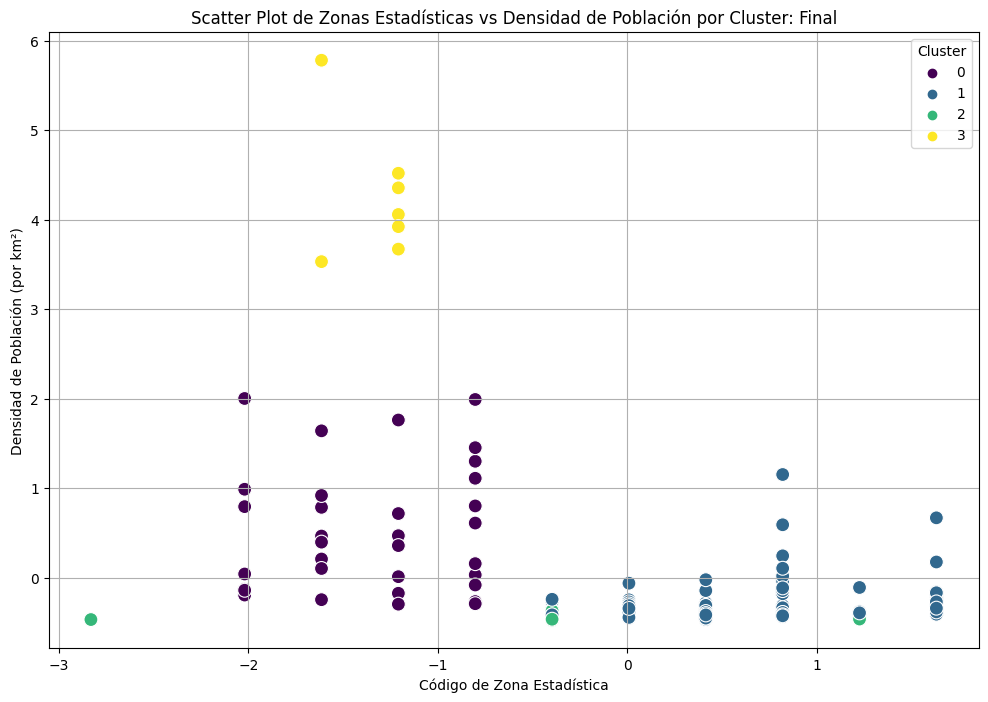

In [ ]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, data=X, palette='viridis', s=100)
plt.title('Scatter Plot de Zonas Estadísticas vs Densidad de Población por Cluster: Final')
plt.xlabel('Código de Zona Estadística')
plt.ylabel('Densidad de Población (por km²)')
plt.legend(title='Cluster')
plt.grid(True)

# Mostrar el gráfico
plt.show()

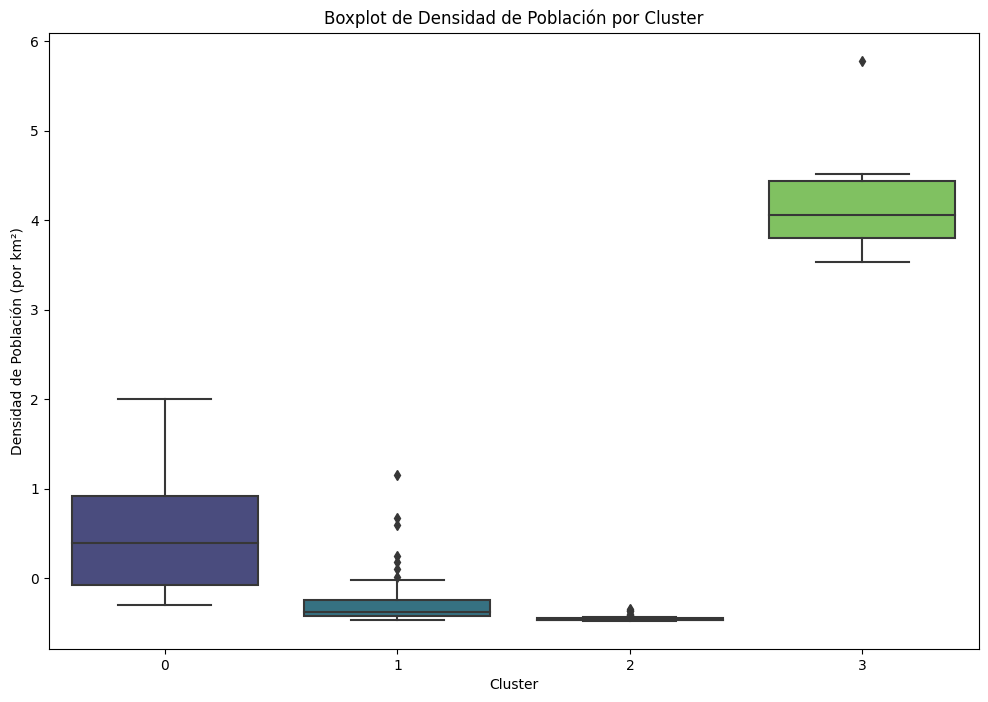

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=labels, y=X[:, 1], data=clustering_data, palette='viridis')
plt.title('Boxplot de Densidad de Población por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Densidad de Población (por km²)')

# Mostrar el gráfico
plt.show()


El boxplot proporcionado muestra la distribución de la densidad de población para cuatro clusters diferentes. Aquí hay un análisis de cada uno:

- **Cluster 0 (azul):**
  - Tiene una mediana cercana a cero, lo que sugiere que la mayoría de las zonas en este cluster tienen una densidad de población muy baja.
  - Presenta muchos valores atípicos, algunos de los cuales son muy extremos, indicando que hay zonas con una densidad de población mucho más alta que la mayoría de las otras zonas en el cluster.
  - El rango intercuartílico (IQR) es pequeño, mostrando poca variación en la densidad de población para la mayoría de las zonas del cluster, aparte de los atípicos.

- **Cluster 1 (cian):**
  - La mediana está ligeramente por encima de cero, indicando que las zonas en este cluster tienen, en promedio, una densidad de población ligeramente más alta que las del Cluster 0.
  - Tiene pocos valores atípicos, y su IQR es también pequeño, lo que implica que las zonas son bastante homogéneas en cuanto a densidad de población.

- **Cluster 2 (verde):**
  - La mediana es mucho más alta que la de los Clusters 0 y 1, lo que indica que las zonas en este cluster tienen una densidad de población significativamente más alta.
  - El IQR es moderado, sugiriendo que hay más variación en la densidad de población dentro de este cluster en comparación con el 1, pero menos que en el 0.
  - Hay algunos valores atípicos, lo que señala la presencia de zonas con densidad de población aún más alta dentro del cluster.

- **Cluster 3 (verde oscuro):**
  - Tiene la mediana más alta de todos los clusters, lo que indica que este cluster tiene las zonas con la mayor densidad de población.
  - El IQR es relativamente amplio, lo que indica una variabilidad significativa dentro de las zonas de este cluster.
  - No presenta valores atípicos, lo que sugiere que todas las zonas tienen densidades de población relativamente similares y altas.

### Conclusiones

- **Cluster 0** puede representar zonas rurales o subdesarrolladas con algunas áreas urbanas densamente pobladas como excepciones.
- **Cluster 1** también representa áreas con baja densidad de población, pero con menos variación y atípicos que el Cluster 0.
- **Cluster 2** parece indicar zonas de transición, quizás suburbios o ciudades pequeñas con una densidad de población moderada y más uniforme.
- **Cluster 3** probablemente comprende áreas urbanas densamente pobladas con una alta variabilidad en la densidad de población, reflejando una diversidad de ambientes urbanos.

Para interpretaciones más específicas, sería útil comprender las características exactas de las zonas estadísticas y cómo se ha calculado la densidad de población.

## Número de clusters

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X, labels, metric='euclidean')
print(f'Coherencia: {silhouette}')

Coherencia: 0.489041542083304


El coeficiente de silueta es una medida de cuán similares son un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El rango de este coeficiente va de -1 a 1, donde un valor alto indica que el objeto está bien emparejado a su propio cluster y mal emparejado a los vecinos. Si estás buscando clusters de municipios que sean homogéneos internamente y bien diferenciados entre sí, el coeficiente de silueta puede ser un indicador útil para determinar el número óptimo de clusters.

El valor más alto de coeficiente de silueta se obtiene con 6 clusters, lo que indica que esta configuración tiene una mejor definición de clusters en términos de cohesión y separación comparado con las configuraciones de 3 y 4 clusters. En otras palabras, cada municipio encaja mejor en su propio cluster y está más distante de los otros clusters cuando se utilizan 6 grupos.

Sin embargo, la elección del "mejor" número de clusters no debe basarse únicamente en el coeficiente de silueta. También es importante considerar el contexto y la interpretabilidad de los clusters. Por ejemplo:

- Si los clusters con 6 grupos se corresponden con diferencias significativas y útiles en la realidad de los municipios que estás analizando, podría justificarse su elección.
- Si el aumento de clusters de 4 a 6 no aporta un valor práctico adicional o los clusters adicionales no tienen sentido desde una perspectiva práctica o teórica, entonces podrías optar por menos clusters.

Además, el gráfico del método del codo sugiere que después de 4 clusters, las mejoras en la suma de cuadrados dentro de los clusters se vuelven menos significativas, lo que también podría ser un argumento para elegir un número menor de clusters.

In [ ]:
clustering_data.to_csv('clustering_zzee_dp.csv', index=False, sep=';', encoding='latin-1')